In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

# Data Loading

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Data cleaning

In [4]:
df.isnull().sum()    # checking null values in my data_set

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

**No null Values found in my data_set**

In [5]:
df.duplicated().sum() # Checking duplicate data

1081

In [6]:
df.info() # info about Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# Perform EDA on Data_set

## Get some basic statistics about the data

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
# Explore the distribution of the target variable (Class)
print(df['Class'].value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


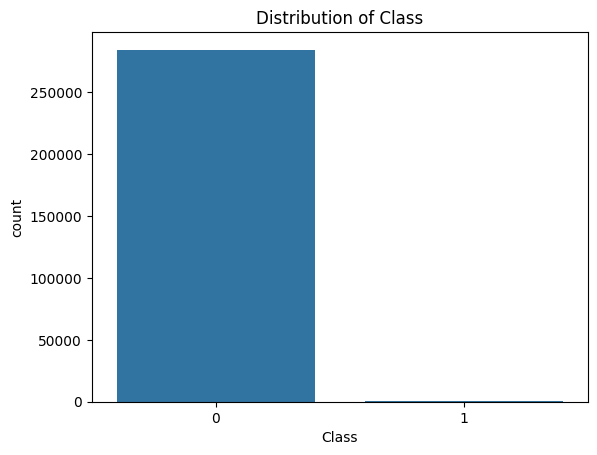

In [9]:
sns.countplot(x='Class', data=df)
plt.title('Distribution of Class')
plt.show()

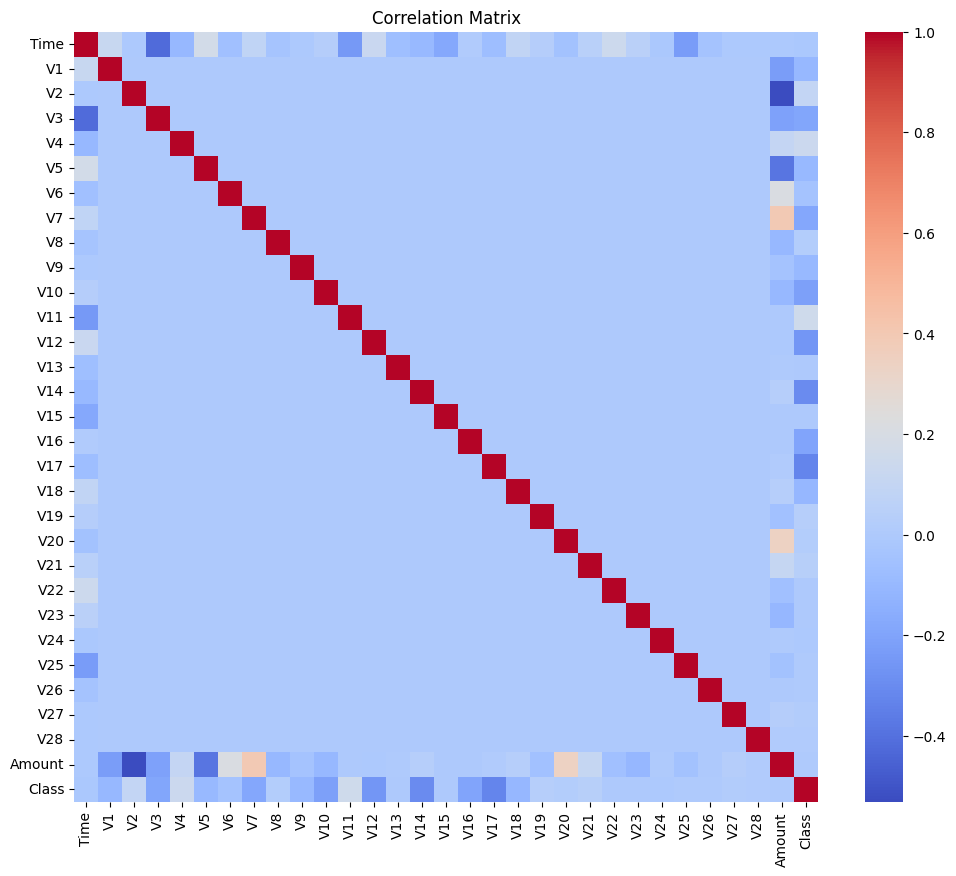

In [10]:
# Explore the correlation between features
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

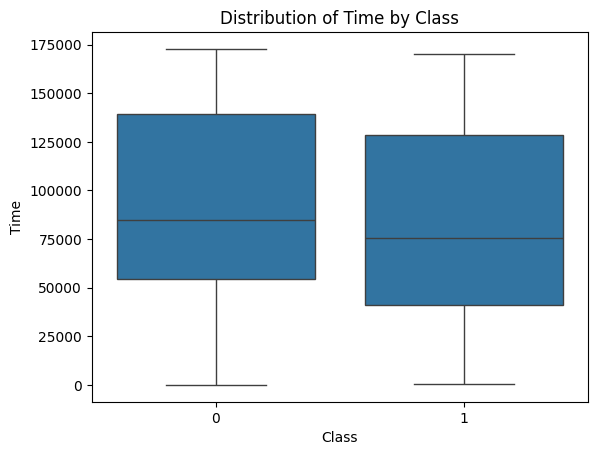

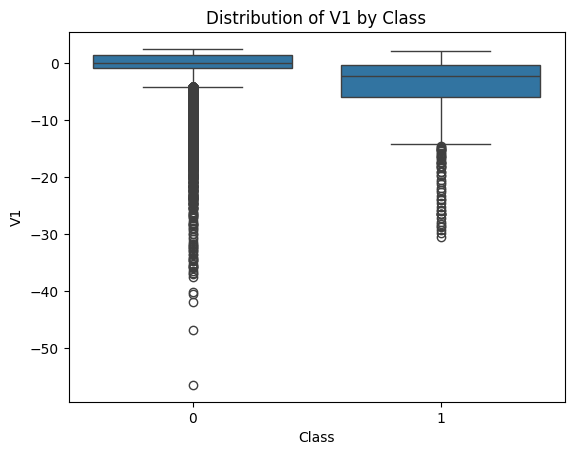

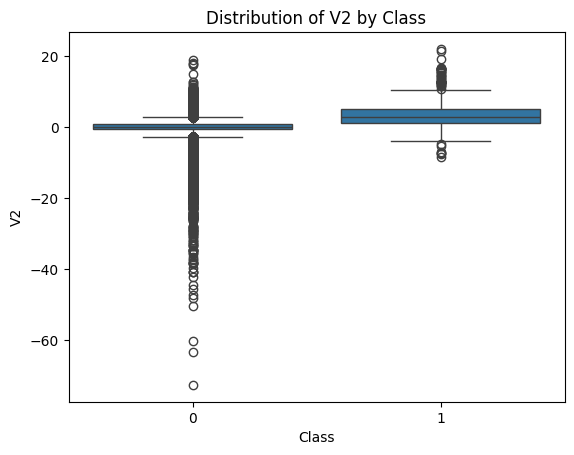

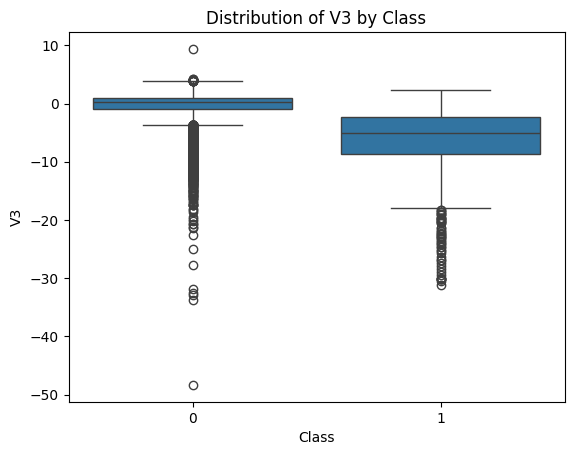

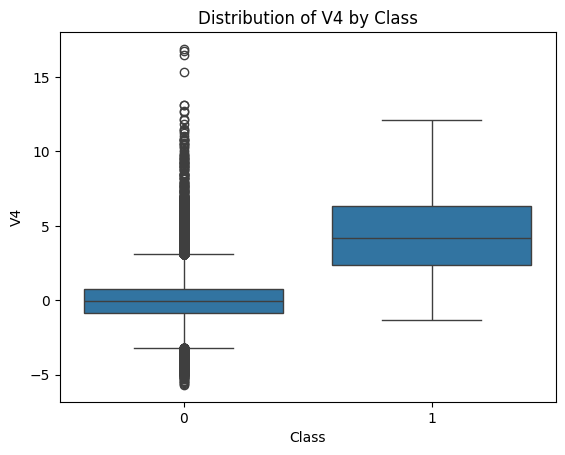

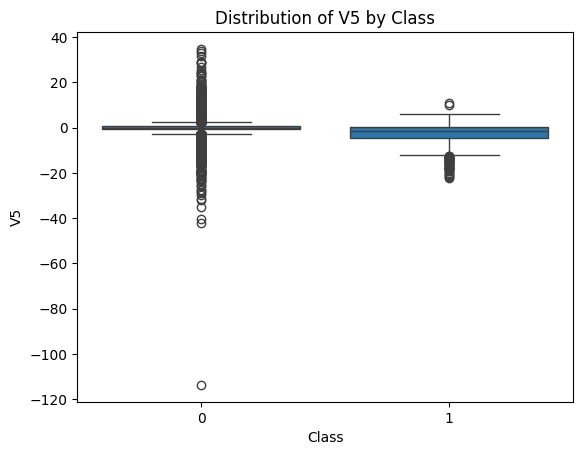

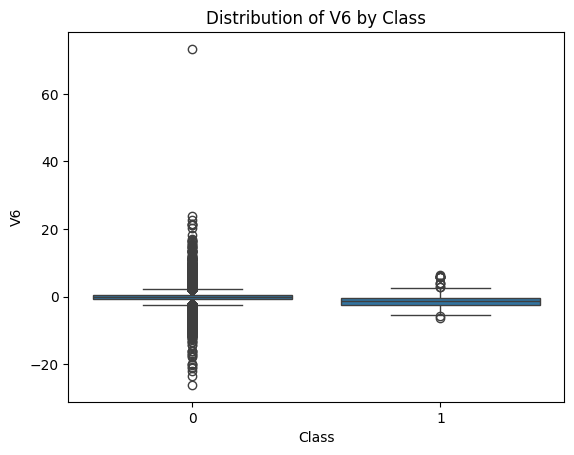

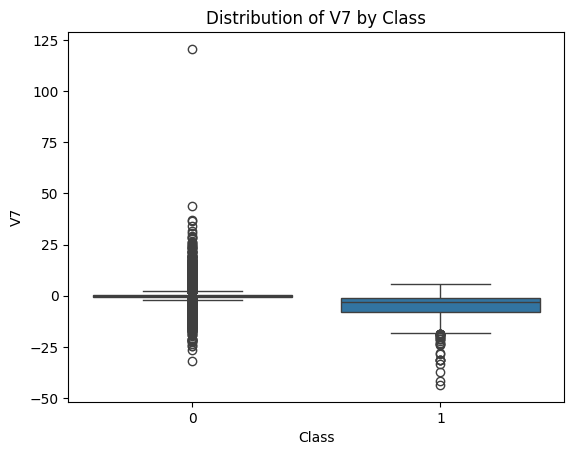

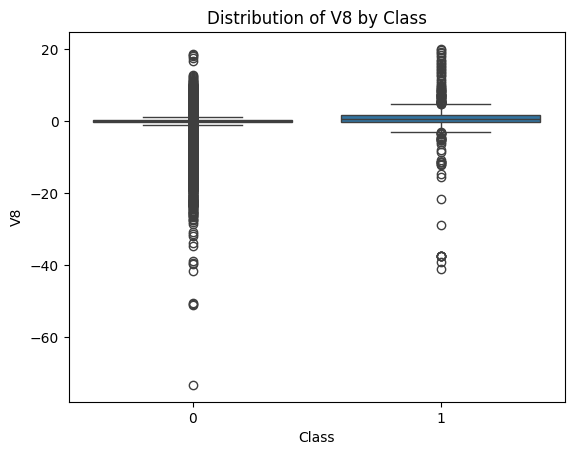

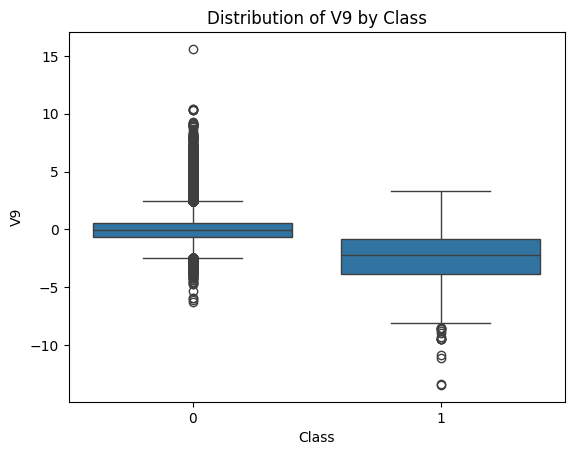

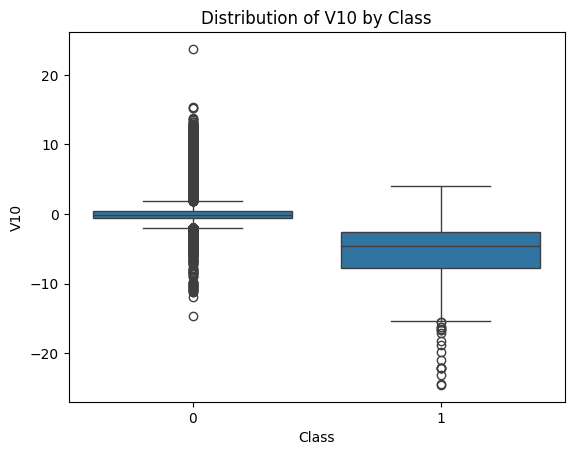

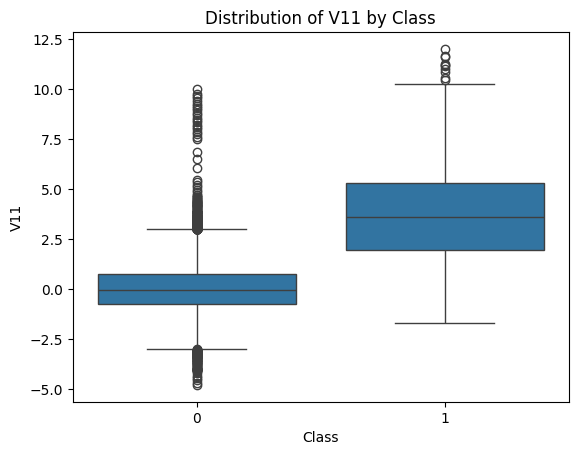

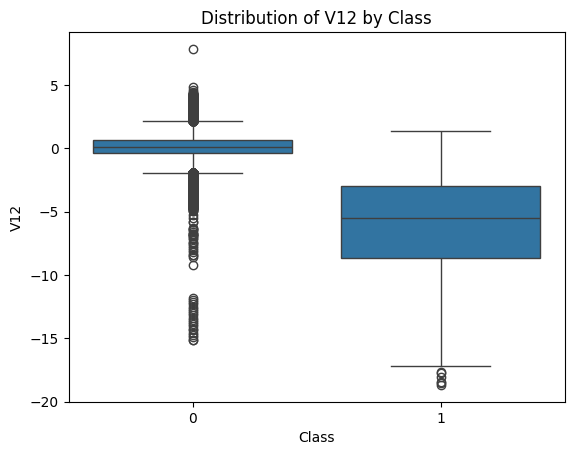

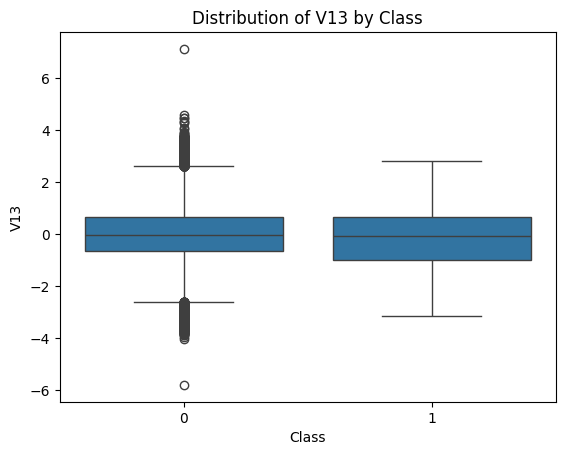

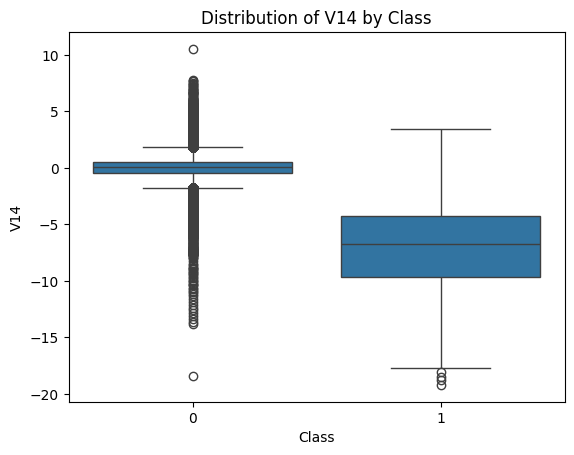

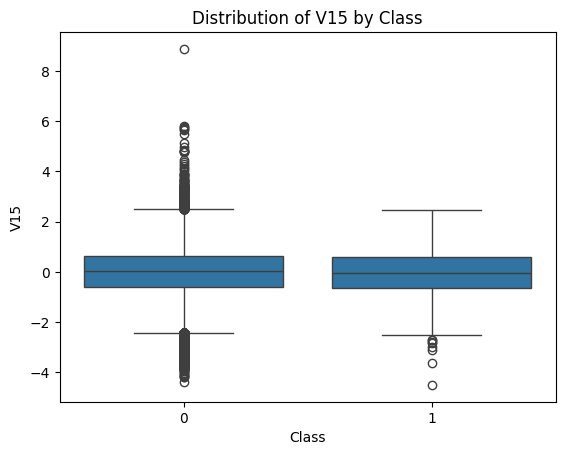

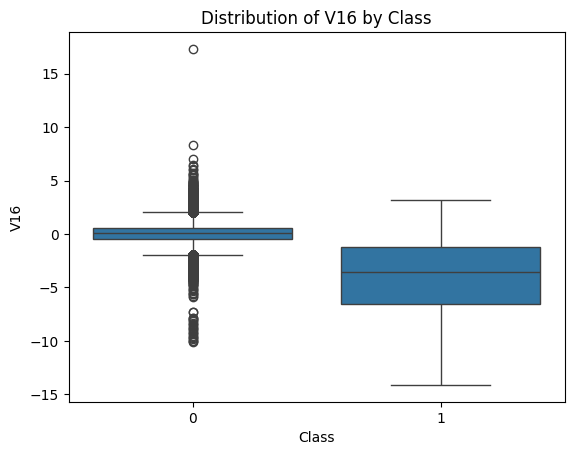

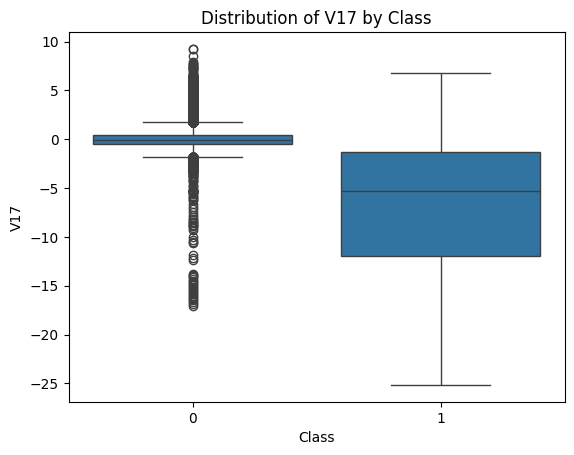

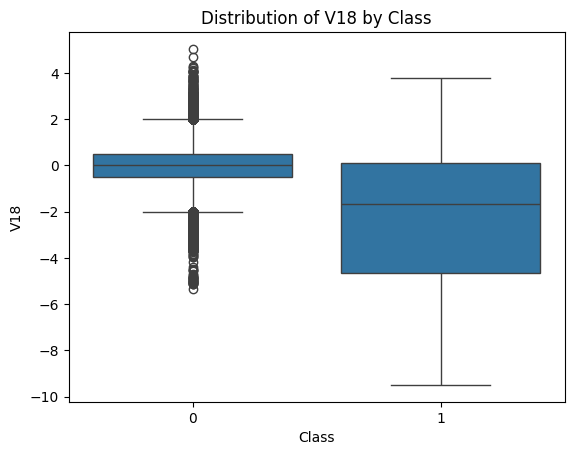

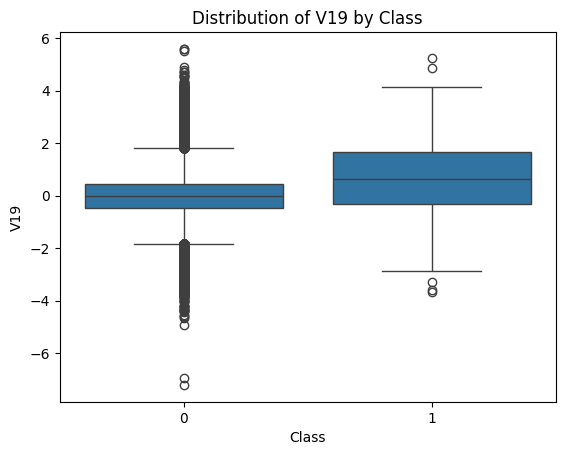

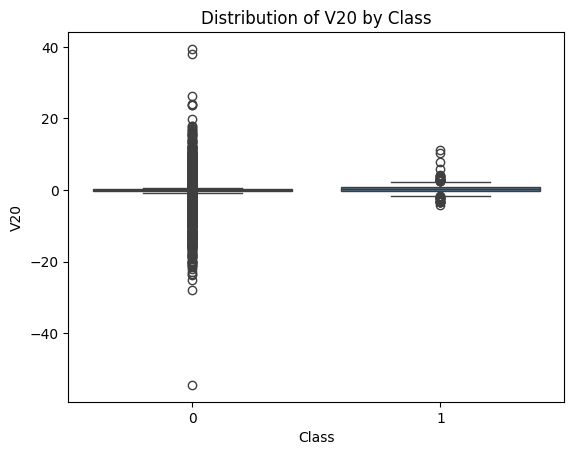

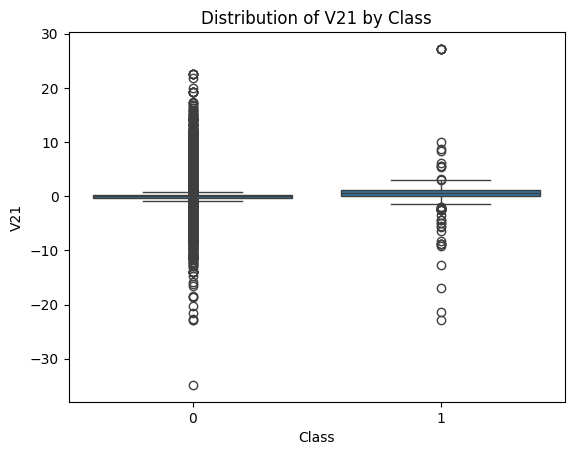

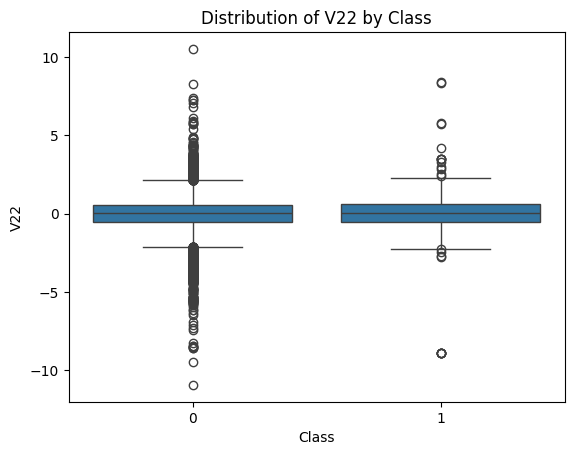

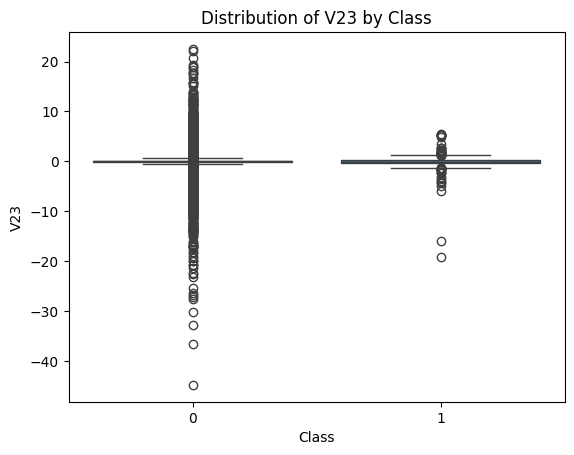

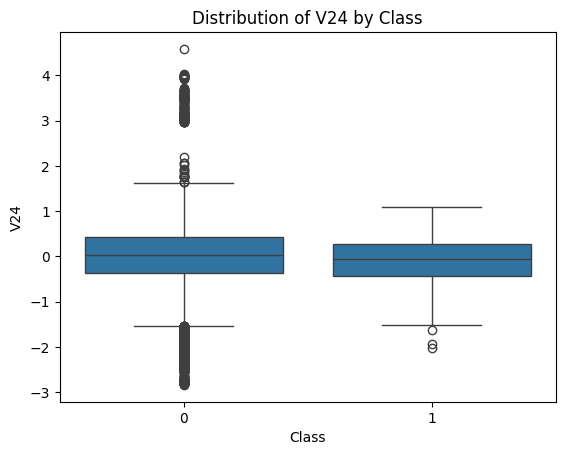

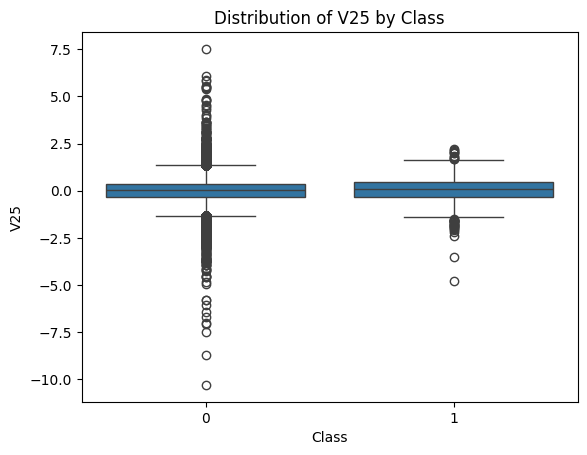

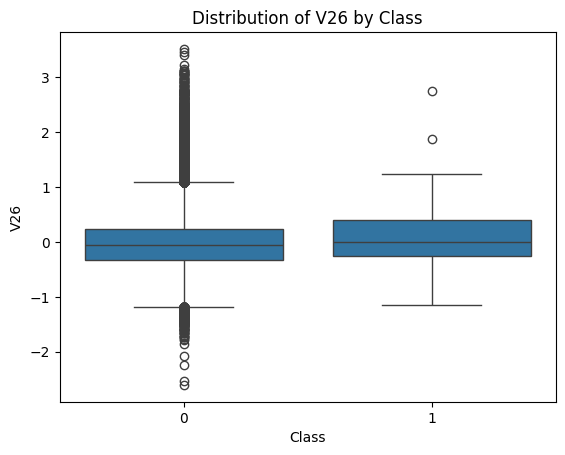

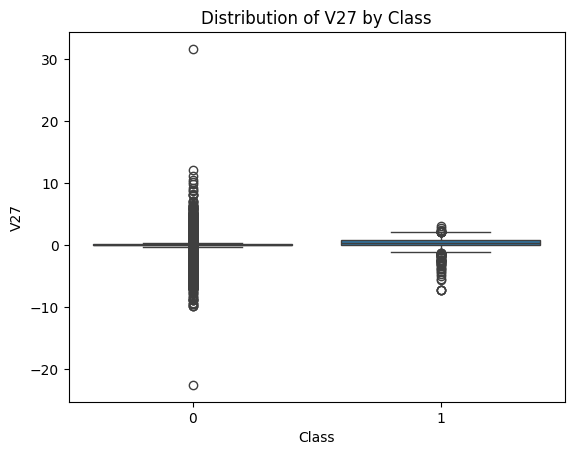

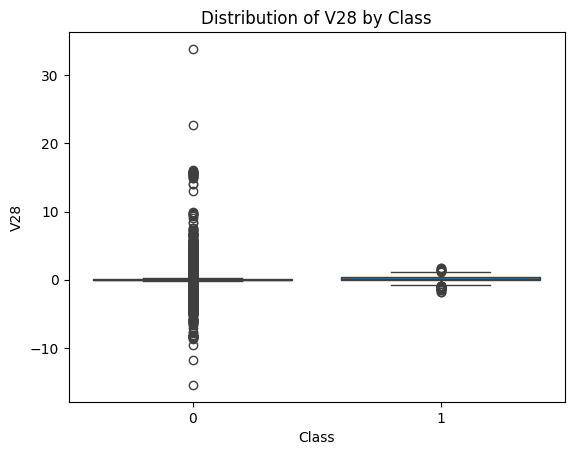

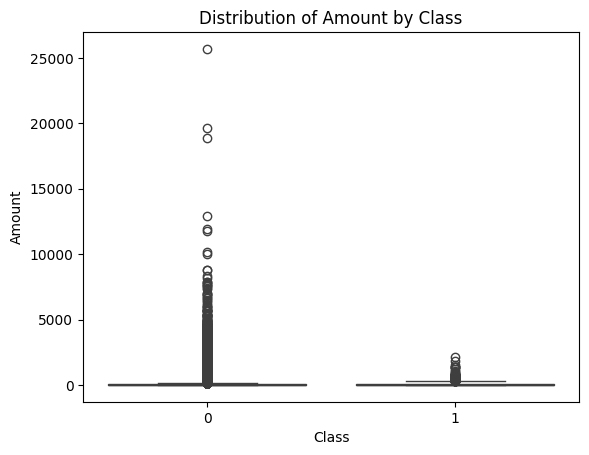

In [11]:
# Analyze the distribution of features for different classes
for column in df.columns[:-1]:  # Exclude the 'Class' column
  plt.figure()
  sns.boxplot(x='Class', y=column, data=df)
  plt.title(f'Distribution of {column} by Class')
  plt.show()

# Anomaly Detection: 

##  Identifying unusual patterns or deviations from normal behavior within data.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [17]:
# Separate features (X) and target variable (y)
X = df.drop('Class', axis=1)
y = df['Class']


In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [20]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [21]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.998735999438222


In [22]:
# Identify potential anomalies (fraudulent transactions in this case)
anomalies = X_test[y_pred == 1]

In [26]:
# from normal transactions.
print("Potential anomalies:" , anomalies)


Potential anomalies:             Time         V1         V2         V3         V4         V5  \
43428    41505.0 -16.526507   8.584972 -18.649853   9.505594 -13.793819   
229036  145773.0 -32.058119 -48.060856  -6.939376  10.856608  26.647697   
77099    56887.0  -0.075483   1.812355  -2.566981   4.127549  -1.628532   
82400    59385.0  -7.626924  -6.976420  -2.077911   3.416754   4.458758   
12156    21177.0  -5.905517   6.040280 -11.091637   5.797571  -6.193890   
...          ...        ...        ...        ...        ...        ...   
244333  152307.0  -5.222968   4.641827  -8.858204   7.723502  -1.507035   
77814    57225.0 -22.435671 -21.510079  -3.711944   6.479684   2.177843   
111690   72327.0  -4.198735   0.194121  -3.917586   3.920748  -1.875486   
152223   97121.0 -17.976266  12.864989 -19.575066  11.345120 -13.998646   
6903      8886.0  -2.535852   5.793644  -7.618463   6.395830  -0.065210   

               V6         V7        V8        V9  ...        V20       V21  \


In [27]:
#  using Isolation Forest
from sklearn.ensemble import IsolationForest

# Train an Isolation Forest model
model = IsolationForest(contamination=0.01)  # contamination: proportion of outliers
model.fit(X_train)

# Predict anomalies
y_pred = model.predict(X_test)

# Identify anomalies (-1 indicates an anomaly)
anomalies_isolation_forest = X_test[y_pred == -1]
print("Potential anomalies (Isolation Forest):")
print(anomalies_isolation_forest)

Potential anomalies (Isolation Forest):
            Time         V1         V2         V3        V4         V5  \
43428    41505.0 -16.526507   8.584972 -18.649853  9.505594 -13.793819   
219257  141655.0 -29.942972 -25.831782 -16.227512  6.690679 -20.787846   
78200    57415.0  -6.221664   1.942683  -2.308726 -0.386312  -4.885210   
113740   73184.0  -5.136552   5.746647  -3.838599 -0.329163   1.288327   
116404   74262.0  -2.250535   2.365755  -2.955491  0.089791  -2.830745   
...          ...        ...        ...        ...       ...        ...   
82290    59343.0  -7.936875  -5.162653  -1.091680  0.572356  -4.780864   
253712  156375.0  -8.737043 -12.302338  -3.512570  0.946510  -7.970677   
13270    23382.0  -4.000885  -5.022169  -0.830166  0.025937  -3.263033   
123326   76884.0 -10.924306   8.486126  -5.303020 -2.547358  -5.055657   
33756    37373.0  -7.504323 -15.633772  -4.215051  1.507090  -5.412604   

               V6         V7        V8        V9  ...        V20       

# Machine Learning Models:

## Employing algorithms like Logistic Regression, Decision Trees, or Neural Networks for predictive analysis.

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [29]:
# Train a Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [30]:
print("Decision Tree Model:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.71      0.81      0.76        98

    accuracy                           1.00     56962
   macro avg       0.86      0.90      0.88     56962
weighted avg       1.00      1.00      1.00     56962



In [31]:
print(confusion_matrix(y_test, y_pred_dt))

[[56832    32]
 [   19    79]]


In [32]:
# Train a Neural Network model
nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)
nn_model.fit(X_train, y_train)
y_pred_nn = nn_model.predict(X_test)

In [33]:
# Evaluate Neural Network model
print("Neural Network Model:")
print(classification_report(y_test, y_pred_nn))

Neural Network Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.58      0.69      0.63        98

    accuracy                           1.00     56962
   macro avg       0.79      0.85      0.81     56962
weighted avg       1.00      1.00      1.00     56962



In [34]:
print(confusion_matrix(y_test, y_pred_nn))

[[56814    50]
 [   30    68]]


# Feature Engineering

## Selecting and transforming relevant features to enhance fraud detection accuracy.

In [35]:
# you could create interaction terms by multiplying or dividing
# relevant features.
X['Amount_V1'] = X['Amount'] * X['V1']
X['Amount_V2'] = X['Amount'] * X['V2']


In [ ]:
#  Polynomial Features: Generate polynomial features to capture non-linear


In [36]:
# relationships between features and the target variable.
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, interaction_only=True)  # Adjust degree as needed
X_poly = poly.fit_transform(X)

In [ ]:
#  Feature Scaling: Standardize or normalize numerical features to improve model

In [37]:
# regression or neural networks).
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Feature Selection: Identify the most relevant features using techniques

In [38]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

In [39]:
# Train a Random Forest model to get feature importances
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [52]:
# Use RFE to select the top features
selector = RFE(rf_model, n_features_to_select=10) # Choose the number of features to select


In [56]:
from sklearn.decomposition import PCA

# Set n_components to a valid value, e.g., 30
pca = PCA(n_components=30)  # Reduce to 30 principal components
X_train_pca = pca.fit_transform(X_train)

# Now fit the selector on the reduced data
selector = selector.fit(X_train_pca, y_train)


In [53]:
selector = RFE(model, n_features_to_select=10, verbose=1)


In [57]:
# Get the selected features
selected_features = X_train.columns[selector.support_]
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

### Domain-Specific Features: Incorporate domain knowledge to create features

In [58]:
# Retrain the model with the engineered features.
model = LogisticRegression()
model.fit(X_train_selected, y_train)

LogisticRegression()

In [59]:
# Make predictions on the test set
y_pred = model.predict(X_test_selected)

In [62]:
# Evaluate the model's performance with the new features
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (with Feature Engineering): {accuracy*100:2f}%")

Accuracy (with Feature Engineering): 99.906956%


In [61]:
# Analyze the identified anomalies with the new features.
anomalies = X_test_selected[y_pred == 1]
print("Potential anomalies (with Feature Engineering):")
print(anomalies)

Potential anomalies (with Feature Engineering):
               V4        V10        V12       V13        V14        V21  \
43428    9.505594 -14.110184 -10.834006  1.671120  -9.373859   1.190739   
77099    4.127549  -3.555835  -5.479802 -2.115503  -5.588786   0.794372   
15810    6.378395  -8.233721  -6.525668  0.923759  -6.325975   1.784316   
12156    5.797571 -10.764826 -14.257071  0.291994 -12.399408   1.504905   
18125    4.144697  -6.817204  -7.856837 -1.264948  -9.507248   0.898657   
...           ...        ...        ...       ...        ...        ...   
102443   3.320337  -5.052502  -4.610756 -1.909488  -9.072711  27.202839   
244333   7.723502  -2.239066  -8.493488 -1.092811 -13.237559   0.561892   
111690   3.920748  -4.684233  -5.007441 -1.304745  -6.192475   0.801312   
152223  11.345120 -16.601197 -13.932249 -0.204855  -7.581023  -4.300432   
6903     6.395830  -7.297803 -10.001046 -0.207935 -10.860698   0.716720   

             V22       V25       V27  Amount  
4342

# Real-time Monitoring: 

##  Implementing systems that can detect and respond to fraudulent activities in real-time.


### For real-time monitoring, you would typically use a streaming data processing
### framework like Apache Kafka or Apache Flink. However, for a basic example,
### we can simulate real-time monitoring by processing new transactions as they arrive.


In [63]:
import time

def process_new_transaction(transaction_data):


    # Predict using your trained model
    prediction = model.predict([transaction_data])[0]

    if prediction == 1:
        print("Potential fraud detected for transaction:", transaction_data)
        # Trigger an alert or take action (e.g., block transaction)
    else:
        print("Transaction is considered legitimate.")

In [65]:
# Logistic regression model initialization
model = LogisticRegression()

# Fit the model with training data (X_train, y_train)
model.fit(X_train, y_train)  # Ensure that model is trained

# Process new transactions
for i in range(10):
    # Simulate receiving new transaction data
    new_transaction = X_test.iloc[i].values.reshape(1, -1)  # Make sure it's in the correct shape

    # Process the new transaction (predict class or probability)
    prediction = model.predict(new_transaction)  # Make prediction

    # Introduce a short delay (simulate real-time flow)
    time.sleep(0.5)

    print(f"Prediction for transaction {i}: {prediction}")


Prediction for transaction 0: [1]
Prediction for transaction 1: [0]
Prediction for transaction 2: [0]
Prediction for transaction 3: [0]
Prediction for transaction 4: [0]
Prediction for transaction 5: [0]
Prediction for transaction 6: [0]
Prediction for transaction 7: [0]
Prediction for transaction 8: [0]
Prediction for transaction 9: [0]


#  Scalability:

##  Designing fraud detection systems capable of handling large volumes of transactions efficiently.

### To improve scalability, consider the following strategies:

 **1. Distributed Processing: Utilize a distributed computing framework like Apache Spark or Hadoop to process large datasets in parallel across multiple machines. This allows for faster training and prediction times, especially when dealing with massive amounts of transaction data.**

 ### 2. Feature Engineering Optimization:
 **Optimize Feature Extraction: Implement efficient feature extraction techniques that minimize computational overhead during data preprocessing. Feature Selection: Reduce the dimensionality of the feature space by selecting the most relevant features for fraud detection. This can significantly improve the performance of the model and reduce computational load.***

 ### Model Selection:
 **Choose Scalable Models: Opt for machine learning models known for their ability to handle large datasets efficiently. Examples include linear models, decision trees, and ensemble methods like Random Forest.**
**Model Optimization: Tune model parameters to achieve a good balance between accuracy and performance. Consider techniques like early stopping for neural networks or pruning for decision trees to limit training time and resource consumption.**
